In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

In [2]:
tracks = pd.read_csv("./data/cleaned_data_mil.csv")

In [3]:
track_data = tracks.copy()

encoder = LabelEncoder()
track_data['genre'] = encoder.fit_transform(track_data['genre'])

features = track_data[['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 
                       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                       'time_signature']]
target = track_data['genre']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   n_neighbors  accuracy  precision_micro  recall_micro  f1_micro  \
0           20  0.534469         0.534469      0.534469  0.534469   
1           50  0.539186         0.539186      0.539186  0.539186   
2           60  0.539305         0.539305      0.539305  0.539305   
3           70  0.538688         0.538688      0.538688  0.538688   
4          100  0.537793         0.537793      0.537793  0.537793   

   precision_macro  recall_macro  f1_macro  
0         0.528125      0.524959  0.524336  
1         0.534580      0.527254  0.528412  
2         0.535635      0.526810  0.528521  
3         0.534947      0.525132  0.527182  
4         0.534118      0.522193  0.524797  


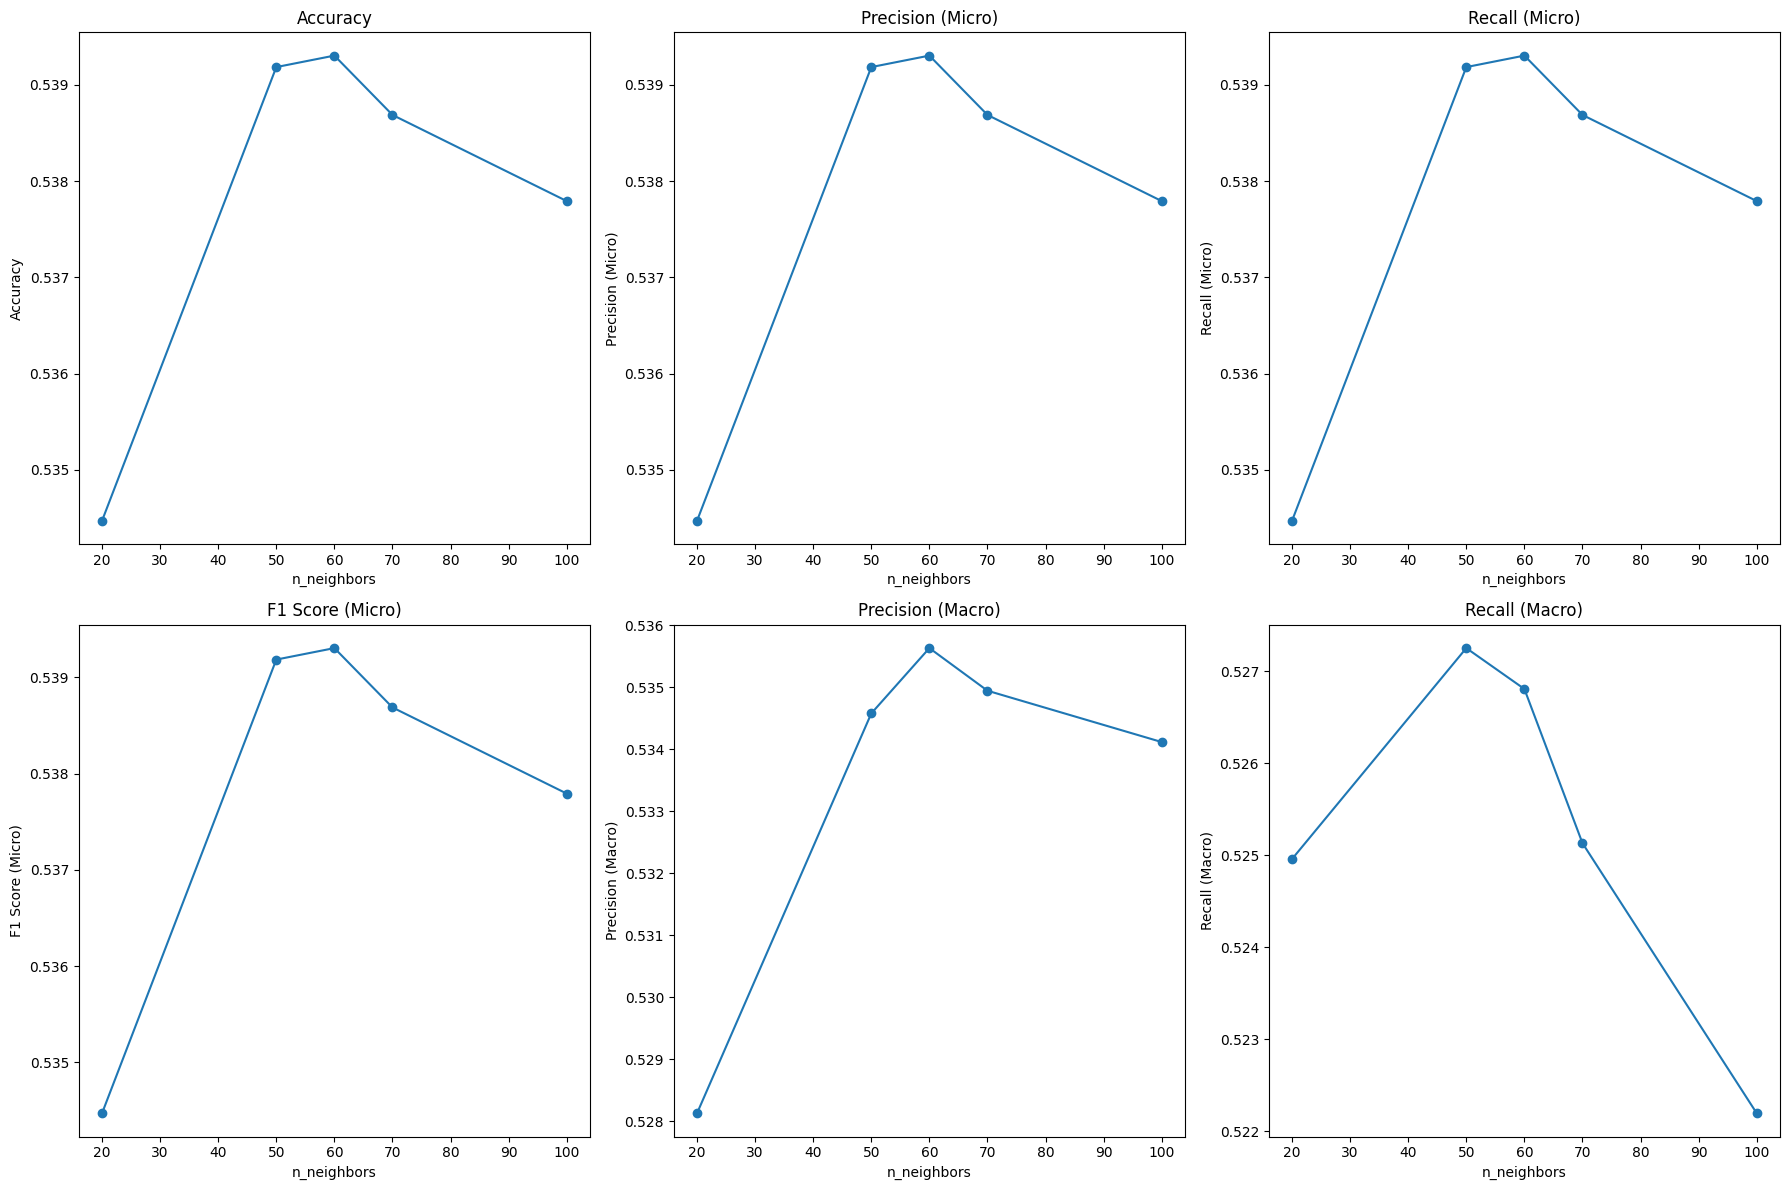

In [5]:
n_neighbors_list = [20, 50, 60, 70, 100]

results = {
    'n_neighbors': [],
    'accuracy': [],
    'precision_micro': [],
    'recall_micro': [],
    'f1_micro': [],
    'precision_macro': [],
    'recall_macro': [],
    'f1_macro': []
}

for n in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    
    results['n_neighbors'].append(n)
    results['accuracy'].append(accuracy)
    results['precision_micro'].append(precision_micro)
    results['recall_micro'].append(recall_micro)
    results['f1_micro'].append(f1_micro)
    results['precision_macro'].append(precision_macro)
    results['recall_macro'].append(recall_macro)
    results['f1_macro'].append(f1_macro)

results_df = pd.DataFrame(results)

print(results_df)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].plot(results['n_neighbors'], results['accuracy'], marker='o')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('n_neighbors')
axs[0, 0].set_ylabel('Accuracy')

axs[0, 1].plot(results['n_neighbors'], results['precision_micro'], marker='o')
axs[0, 1].set_title('Precision (Micro)')
axs[0, 1].set_xlabel('n_neighbors')
axs[0, 1].set_ylabel('Precision (Micro)')

axs[0, 2].plot(results['n_neighbors'], results['recall_micro'], marker='o')
axs[0, 2].set_title('Recall (Micro)')
axs[0, 2].set_xlabel('n_neighbors')
axs[0, 2].set_ylabel('Recall (Micro)')

axs[1, 0].plot(results['n_neighbors'], results['f1_micro'], marker='o')
axs[1, 0].set_title('F1 Score (Micro)')
axs[1, 0].set_xlabel('n_neighbors')
axs[1, 0].set_ylabel('F1 Score (Micro)')

axs[1, 1].plot(results['n_neighbors'], results['precision_macro'], marker='o')
axs[1, 1].set_title('Precision (Macro)')
axs[1, 1].set_xlabel('n_neighbors')
axs[1, 1].set_ylabel('Precision (Macro)')

axs[1, 2].plot(results['n_neighbors'], results['recall_macro'], marker='o')
axs[1, 2].set_title('Recall (Macro)')
axs[1, 2].set_xlabel('n_neighbors')
axs[1, 2].set_ylabel('Recall (Macro)')

plt.tight_layout()
plt.show()

In [7]:
results_df.to_csv('./result/KNN_Model_Evaluation_Results.txt', sep='\t', index=False)

def save_plot(y_values, title, ylabel, filename):
    plt.figure()
    plt.plot(results['n_neighbors'], y_values, marker='o')
    plt.title(title)
    plt.xlabel('n_neighbors')
    
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(f'./result/{filename}')
    plt.close()

save_plot(results['accuracy'], 'Accuracy', 'Accuracy', 'KNN_Accuracy.png')
save_plot(results['precision_micro'], 'Precision (Micro)', 'Precision (Micro)', 'KNN_Precision_Micro.png')
save_plot(results['recall_micro'], 'Recall (Micro)', 'Recall (Micro)', 'KNN_Recall_Micro.png')
save_plot(results['f1_micro'], 'F1 Score (Micro)', 'F1 Score (Micro)', 'KNN_F1_Micro.png')
save_plot(results['precision_macro'], 'Precision (Macro)', 'Precision (Macro)', 'KNN_Precision_Macro.png')
save_plot(results['recall_macro'], 'Recall (Macro)', 'Recall (Macro)', 'KNN_Recall_Macro.png')
save_plot(results['f1_macro'], 'F1 Score (Macro)', 'F1 Score (Macro)', 'KNN_F1_Macro.png')

### Model Evaluation

### Present Multiple Genre

In [ ]:
def predict_top_k(knn, X, k=3, n_neighbors=50):
    neighbors = knn.kneighbors(X, n_neighbors=n_neighbors, return_distance=False)

    top_k_predictions = []
    for neighbor in neighbors:
        neighbor_labels = y_train.iloc[neighbor]
        top_k = neighbor_labels.value_counts().head(k).index.tolist()
        top_k_predictions.append(top_k)
    
    print("Top k predictions: ", top_k_predictions)

    return top_k_predictions

In [ ]:
k_genres = 4
top_k_predictions = predict_top_k(knn, X_test_scaled, k=k_genres)

genre_list = []

correct_count = 0
for i, top_k in enumerate(top_k_predictions):
    genre_list.append(y_test.iloc[i])
    if y_test.iloc[i] in top_k:
        correct_count += 1
accuracy_top_k = correct_count / len(y_test)

print("Genre List: ", genre_list)

print(f"Top {k_genres} Accuracy: {accuracy_top_k}")